In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-lT')], 
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-lT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)

import datetime
date_string = datetime.date.today().strftime("%Y-%m-%d")

# for file_name_mc, file_name_alg1 in zip(json_files_mc, json_files_alg1):
#     date = file_name_mc[6:len(file_name_mc) - 5] #the date is the same for the two for how run.py is constructed
#     if date_string == date:
#         #take the current simulation
#         file_to_load_mc = file_name_mc
#         file_to_load_alg1 = file_name_alg1
#     else:
#         #take the last simulation
#         file_to_load_mc = json_files_mc[0] 
#         file_to_load_alg1 = json_files_alg1[0]


mc = load_case(json_files_mc[0])
# mc_decor = load_case(json_files_mc[1])
alg1 = load_case(json_files_alg1[0])
# a1_decor = load_case(json_files_alg1[1])

# Files

MC:  ['mc-lT.json']
A1:  ['a1-lT.json']


## mc-lT.json

Temperature: 0.5


## a1-lT.json

Temperature: 0.5


# Ccorrelated samples

Generating theoretical configurations: 8it [00:00, 51941.85it/s]


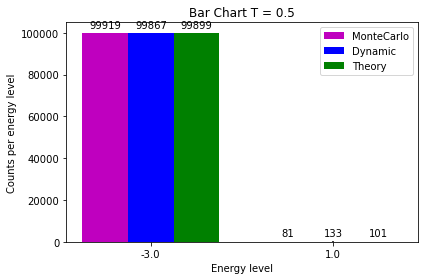

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt
display(Markdown('# Ccorrelated samples'))

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])

mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m, theory_engy_counts, binomial_avg, binomial_std = theoretical_quantities(chain, n_samples=n_samples)

multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, binomial_avg, theory_engy,
                                                                                          binomial_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, binomial_avg, theory_engy, binomial_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=binomial_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

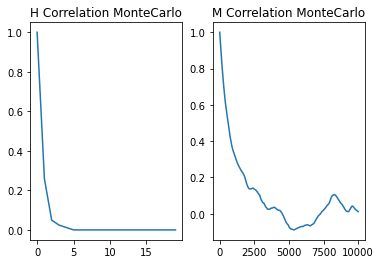

In [4]:
mc_engy_corr = acrl(mc["energy_sample"], 20)
mc_m_corr = acrl(mc["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

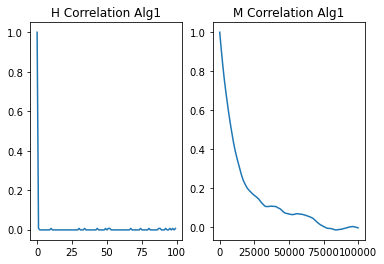

In [5]:
fmax = 1000
alg1_engy_corr = acrl(alg1["energy_sample"], 100)
alg1_m_corr = acrl(alg1["magnetization_sample"], fmax)

ts = np.arange(fmax) * alg1["frame_step"]
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(ts, alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [6]:
#H0: the sample goes like the theoretical one
print(f'pvalue one-sample mc:', gof(f_obs=list(mc_engy_counts.values()), f_exp=theory_engy_counts))
print(f'pvalue one-sample alg1:', gof(f_obs=list(alg1_engy_counts.values()), f_exp=theory_engy_counts))

pvalue one-sample mc: 0.9701235973929903
pvalue one-sample alg1: 0.9951483208174758


In [7]:
#H0: the sample goes like the theoretical one
print(f'pvalue one-sample mc:', gof(f_obs=list(mc_engy_counts.values()), f_exp=theory_engy_counts))
print(f'pvalue one-sample alg1:', gof(f_obs=list(alg1_engy_counts.values()), f_exp=theory_engy_counts))

#H0: the two samples came from the same distribution
print(f'pvalue two-sample energy:', two_sample_chi2test(mc_engy_counts, alg1_engy_counts, n_samples_a=len(mc["energy_sample"]), 
                                                        n_samples_b=len(alg1["energy_sample"])))
print(f'pvalue two-sample magnetization:', two_sample_chi2test(mc_m_counts, alg1_m_counts, n_samples_a=len(mc["magnetization_sample"]), 
                                                               n_samples_b=len(alg1["magnetization_sample"])))

pvalue one-sample mc: 0.9701235973929903
pvalue one-sample alg1: 0.9951483208174758
pvalue two-sample energy: 0.999624243129437
pvalue two-sample magnetization: 1.0


In [8]:
# display(Markdown('# Decorrelated samples'))
# mc_m_counts = count_variables(mc_decor["magnetization_sample"])
# alg1_m_counts = count_variables(a1_decor["magnetization_sample"])

# mc_engy_counts = count_variables(mc_decor["energy_sample"])
# alg1_engy_counts = count_variables(a1_decor["energy_sample"])

# chain = Chain(size=a1_decor["number of spins"], temperature = a1_decor["temperature"])
# n_samples = len(a1_decor["energy_sample"])
# theory_engy, theory_m, theory_engy_counts, binomial_avg, binomial_std = theoretical_quantities(chain, n_samples=n_samples)

# multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, binomial_avg, theory_engy,
#                                                                                           binomial_std)
# multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, binomial_avg, theory_engy, binomial_std)

# fig, ax = plt.subplots()
# labels = mc_engy_counts.keys()
# x = np.arange(len(labels)) 
# width = 0.25
# rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
#                 label='MonteCarlo', color='m')
# rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
#                 label='Dynamic', color='b')
# theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
# rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=binomial_std, align='center',
#                 label='Theory', color='g')

# ax.set_title('Bar Chart T = 0.5')
# ax.set_ylabel('Counts per energy level')
# ax.set_xlabel('Energy level')
# ax.set_xticks(x + width)
# ax.set_xticklabels([i for i in labels])
# ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
# fig.tight_layout()

# #H0: the sample goes like the theoretical one
# print(f'pvalue one-sample mc:', gof(f_obs=list(mc_engy_counts.values()), f_exp=theory_engy_counts))
# print(f'pvalue one-sample alg1:', gof(f_obs=list(alg1_engy_counts.values()), f_exp=theory_engy_counts))

# #H0: the two samples came from the same distribution
# print(f'pvalue two-sample energy:', two_sample_chi2test(mc_engy_counts, alg1_engy_counts, n_samples_a=len(mc["energy_sample"]), 
#                                                         n_samples_b=len(alg1["energy_sample"])))
# print(f'pvalue two-sample magnetization:', two_sample_chi2test(mc_m_counts, alg1_m_counts, n_samples_a=len(mc["magnetization_sample"]), 
#                                                                n_samples_b=len(alg1["magnetization_sample"])))